# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set plotly renderer for proper HTML/PDF export
pio.renderers.default = "notebook+png"

1. Load all pokemon data (from previous Homework)


In [2]:
# write your code here
df = pd.read_csv("pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


2. Are there any missing values? If so, in which column? \
   Ans: Type 2 has 386 missing values.


3. Calculate the average 'Attack' of each pokemon 'Type 1'. Which type has the most Attack stats? \
   Ans: Dragon


In [3]:
avg_attack = df.groupby("Type 1")["Attack"].mean().sort_values(ascending=False)
avg_attack

Type 1
Dragon      112.125000
Fighting     96.777778
Ground       95.750000
Rock         92.863636
Steel        92.703704
Dark         88.387097
Fire         84.769231
Flying       78.750000
Poison       74.678571
Water        74.151786
Ghost        73.781250
Normal       73.469388
Grass        73.214286
Ice          72.750000
Psychic      71.456140
Bug          70.971014
Electric     69.090909
Fairy        61.529412
Name: Attack, dtype: float64

4. Aggregate count of each Pokemon Type 1


In [4]:
type_counts = df["Type 1"].value_counts()
type_counts

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

5. Create a visualization that show proportion of each pokemon Type 1 in the dataset\
   **Hint:** plotly


In [5]:
type_counts = df["Type 1"].value_counts().reset_index()
type_counts.columns = ["Type 1", "Count"]
fig = px.pie(type_counts, values="Count", names="Type 1", title="Proportion of Each Pokemon Type 1")
fig.show()

6. Create a line plot of 'Attack', 'Defense', and 'HP' of Bulbasaur evolution. \
   Bulbasaur -> Ivysaur -> Venusaur


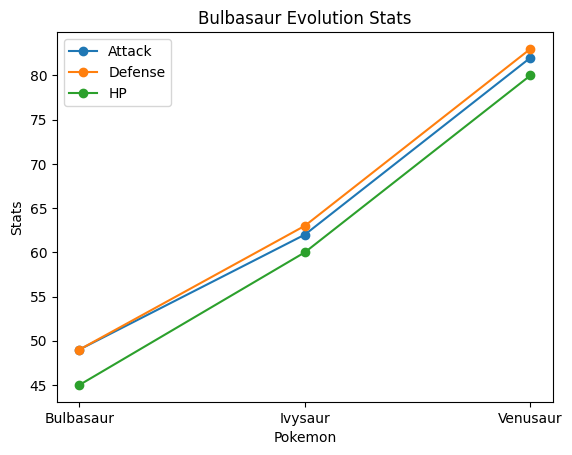

In [6]:
bulbasaur_evo = df[df["Name"].isin(["Bulbasaur", "Ivysaur", "Venusaur"])]
stats = ["Attack", "Defense", "HP"]

fig, ax = plt.subplots()
for stat in stats:
    ax.plot(bulbasaur_evo["Name"], bulbasaur_evo[stat], marker="o", label=stat)

ax.set_xlabel("Pokemon")
ax.set_ylabel("Stats")
ax.set_title("Bulbasaur Evolution Stats")
ax.legend()
plt.show()

7. Create a histogram of Pokemon total stats


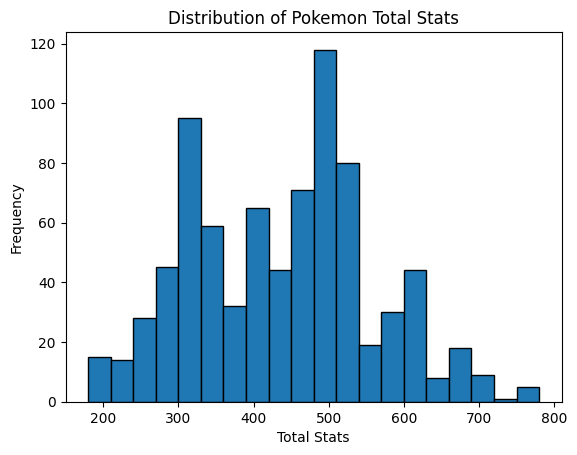

In [7]:
plt.hist(df["Total"], bins=20, edgecolor="black")
plt.xlabel("Total Stats")
plt.ylabel("Frequency")
plt.title("Distribution of Pokemon Total Stats")
plt.show()